## Eigen-Portfolio Construction using Principal Component Analysis (PCA)

### PCA via `sklearn.decomposition` using Major Fiat Currency Exchange Rates

Welcome to the Principal Component Analysis (PCA) study on **foreign exchange (FX) markets**. 

The goal of this project is to perform a Principal Component Analysis (PCA) on the returns of selected currencies over specified time windows. 

Beyond simply interpreting the components’ weights in economic or financial terms, the analysis aims to identify the portfolios corresponding to 

principal components that produced the highest returns in each quarter and examine whether these portfolios persisted into subsequent quarters. 

Furthermore, the study investigates how the composition of top-performing portfolios varies across consecutive quarters and on a year-over-year 

basis, providing insight into the stability and dynamics of dominant currency factors over time.

---


In [214]:

import numpy as np
import datetime

try:
    import matplotlib.pyplot as plt
    %matplotlib inline
except:
    pass

try:
    import pandas as pd
    print("  pandas: %s"% pd.__version__)
except:
    print("Missing pandas package")



import warnings
warnings.filterwarnings("ignore")  # keeps the output clean

np.set_printoptions(precision=4, suppress=True)  # neatens PCA matrix displays


  pandas: 2.3.1


In [239]:
# Install if you haven't already
# pip install yfinance

import yfinance as yf
import pandas as pd

# List of tickers for exchange rates
tickers = [
    "EURUSD=X",  # Euro (Germany/France)
    "GBPUSD=X",  # British Pound (UK)
    "JPYUSD=X",  # Japanese Yen
    "RUBUSD=X",  # Russian Ruble
    "CNYUSD=X",  # Chinese Yuan
]


# Download historical data (daily)

fx_data = yf.download(
    tickers,
    start="2007-01-01",
    end="2024-12-30"
)['Close']

# Preview data
print(fx_data.head())


[*********************100%***********************]  5 of 5 completed

Ticker      CNYUSD=X  EURUSD=X  GBPUSD=X  JPYUSD=X  RUBUSD=X
Date                                                        
2007-01-01  0.128107  1.321895  1.964212  0.008412  0.038016
2007-01-02  0.128107  1.327598  1.973399  0.008415  0.038016
2007-01-03  0.128107  1.317107  1.952210  0.008379  0.037987
2007-01-04  0.128279  1.309295  1.942993  0.008415  0.037895
2007-01-05  0.128222  1.298499  1.930800  0.008425  0.037786


In [240]:
returns = fx_data.pct_change().dropna()

log_returns = np.log(1 + returns)


log_returns.index = pd.to_datetime(log_returns.index)
log_returns['Quarter'] = log_returns.index.to_period('Q')

# Group by quarter
quarterly_groups = log_returns.groupby('Quarter')

print(quarterly_groups.ngroups)
print(list(quarterly_groups.groups.keys()))


quarterly_standardized = {}

for q, data in quarterly_groups:
    data = data.drop(columns='Quarter')  # drop helper
    # Standardize using quarterly mean and std
    standardized = (data - data.mean()) / data.std()
    quarterly_standardized[q] = standardized


72
[Period('2007Q1', 'Q-DEC'), Period('2007Q2', 'Q-DEC'), Period('2007Q3', 'Q-DEC'), Period('2007Q4', 'Q-DEC'), Period('2008Q1', 'Q-DEC'), Period('2008Q2', 'Q-DEC'), Period('2008Q3', 'Q-DEC'), Period('2008Q4', 'Q-DEC'), Period('2009Q1', 'Q-DEC'), Period('2009Q2', 'Q-DEC'), Period('2009Q3', 'Q-DEC'), Period('2009Q4', 'Q-DEC'), Period('2010Q1', 'Q-DEC'), Period('2010Q2', 'Q-DEC'), Period('2010Q3', 'Q-DEC'), Period('2010Q4', 'Q-DEC'), Period('2011Q1', 'Q-DEC'), Period('2011Q2', 'Q-DEC'), Period('2011Q3', 'Q-DEC'), Period('2011Q4', 'Q-DEC'), Period('2012Q1', 'Q-DEC'), Period('2012Q2', 'Q-DEC'), Period('2012Q3', 'Q-DEC'), Period('2012Q4', 'Q-DEC'), Period('2013Q1', 'Q-DEC'), Period('2013Q2', 'Q-DEC'), Period('2013Q3', 'Q-DEC'), Period('2013Q4', 'Q-DEC'), Period('2014Q1', 'Q-DEC'), Period('2014Q2', 'Q-DEC'), Period('2014Q3', 'Q-DEC'), Period('2014Q4', 'Q-DEC'), Period('2015Q1', 'Q-DEC'), Period('2015Q2', 'Q-DEC'), Period('2015Q3', 'Q-DEC'), Period('2015Q4', 'Q-DEC'), Period('2016Q1', 'Q-DEC'

In [241]:
for quarter, df in quarterly_groups:
    print(f"{quarter}: {len(df)} days")


2007Q1: 64 days
2007Q2: 65 days
2007Q3: 65 days
2007Q4: 66 days
2008Q1: 65 days
2008Q2: 65 days
2008Q3: 66 days
2008Q4: 66 days
2009Q1: 64 days
2009Q2: 65 days
2009Q3: 66 days
2009Q4: 66 days
2010Q1: 64 days
2010Q2: 65 days
2010Q3: 66 days
2010Q4: 66 days
2011Q1: 64 days
2011Q2: 65 days
2011Q3: 66 days
2011Q4: 65 days
2012Q1: 65 days
2012Q2: 65 days
2012Q3: 65 days
2012Q4: 66 days
2013Q1: 64 days
2013Q2: 65 days
2013Q3: 66 days
2013Q4: 65 days
2014Q1: 64 days
2014Q2: 65 days
2014Q3: 66 days
2014Q4: 66 days
2015Q1: 64 days
2015Q2: 65 days
2015Q3: 66 days
2015Q4: 66 days
2016Q1: 65 days
2016Q2: 65 days
2016Q3: 66 days
2016Q4: 65 days
2017Q1: 65 days
2017Q2: 65 days
2017Q3: 64 days
2017Q4: 64 days
2018Q1: 65 days
2018Q2: 65 days
2018Q3: 65 days
2018Q4: 66 days
2019Q1: 64 days
2019Q2: 64 days
2019Q3: 66 days
2019Q4: 66 days
2020Q1: 65 days
2020Q2: 65 days
2020Q3: 66 days
2020Q4: 66 days
2021Q1: 64 days
2021Q2: 65 days
2021Q3: 66 days
2021Q4: 66 days
2022Q1: 64 days
2022Q2: 65 days
2022Q3: 

In [242]:
quarterly_pca_results = {}

for q, data in quarterly_standardized.items():  # <-- use standardized data
    C = np.cov(data.T)  # covariance of standardized data
    
    eigvals, eigvecs = np.linalg.eig(C)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx]
    eigvecs = eigvecs[:, idx]
    
    quarterly_pca_results[q] = {
        'eigvals': eigvals,
        'eigvecs': eigvecs,
        'explained_variance_ratio': eigvals / np.sum(eigvals)
    }

print("Done! Stored PCA results for each quarter (standardized correctly).")


Done! Stored PCA results for each quarter (standardized correctly).


In [243]:
pd.DataFrame(
    quarterly_pca_results[list(quarterly_pca_results.keys())[11]]['eigvecs'],
    index=tickers,
    columns=[f"PC{i+1}" for i in range(len(tickers))]
)


,PC1,PC2,PC3,PC4,PC5
EURUSD=X,-0.299351,0.237000,0.815132,0.399423,0.173899
GBPUSD=X,0.584566,0.352271,0.218229,0.085151,-0.692325
JPYUSD=X,0.540125,0.081564,0.331856,-0.553372,0.534101
RUBUSD=X,-0.139650,0.895411,-0.358264,-0.002544,0.224450
CNYUSD=X,0.507381,-0.106409,-0.222384,0.725936,0.393451


In [244]:
quarterly_component_returns = {}

for q, data in quarterly_groups:
    data = data.drop(columns='Quarter')
    eigvecs = quarterly_pca_results[q]['eigvecs']
    
    # Principal component time series (for that quarter)
    Z_q = data.values @ eigvecs
    Z_q = pd.DataFrame(Z_q, index=data.index, columns=[f'PC{i+1}' for i in range(eigvecs.shape[1])])
    
    quarterly_component_returns[q] = Z_q


In [245]:
quarterly_mean_returns = {
    q: Z_q.mean() for q, Z_q in quarterly_component_returns.items()
}
quarterly_mean_returns = pd.DataFrame(quarterly_mean_returns).T
print(quarterly_mean_returns)


             PC1       PC2       PC3           PC4       PC5
2007Q1 -0.000183  0.000119  0.000224  1.529283e-04 -0.000028
2007Q2  0.000097  0.000004 -0.000687 -5.001946e-04 -0.000213
2007Q3 -0.000866  0.000721 -0.000953  1.366433e-04  0.000211
2007Q4 -0.000129 -0.000675  0.000056  4.598271e-04  0.000111
2008Q1 -0.001794 -0.001103 -0.000853  3.240034e-07 -0.000048
...          ...       ...       ...           ...       ...
2023Q4 -0.001520  0.000523 -0.000951 -4.171287e-04 -0.000013
2024Q1 -0.000903  0.000190 -0.000715 -6.176256e-04 -0.000241
2024Q2 -0.000354  0.001308 -0.000447  6.974630e-04 -0.000002
2024Q3  0.001561 -0.001274  0.001502  7.353807e-04  0.000483
2024Q4  0.002115 -0.000777  0.000693 -5.059668e-04  0.000163

[72 rows x 5 columns]


In [246]:
best_pc_per_quarter = quarterly_mean_returns.idxmax(axis=1)
print(best_pc_per_quarter)


2007Q1    PC3
2007Q2    PC1
2007Q3    PC2
2007Q4    PC4
2008Q1    PC4
         ... 
2023Q4    PC2
2024Q1    PC2
2024Q2    PC2
2024Q3    PC1
2024Q4    PC1
Freq: Q-DEC, Length: 72, dtype: object


In [247]:
best_weights_per_quarter = {}

for q in best_pc_per_quarter.index:
    best_pc = best_pc_per_quarter[q]        # e.g., 'PC2'
    idx = int(best_pc.replace('PC', '')) - 1 # convert to column index
    eigvecs = quarterly_pca_results[q]['eigvecs']
    weights = eigvecs[:, idx]
    best_weights_per_quarter[q] = weights


In [248]:
weights_df = pd.DataFrame(best_weights_per_quarter, index=tickers)
print(weights_df)


            2007Q1    2007Q2    2007Q3    2007Q4    2008Q1    2008Q2  \
EURUSD=X  0.785554  0.108700 -0.687867  0.002055 -0.178954 -0.111853   
GBPUSD=X -0.022192  0.539756  0.057004  0.396947 -0.778833  0.378182   
JPYUSD=X -0.093885  0.444484 -0.121549 -0.812675  0.215579 -0.729244   
RUBUSD=X  0.611080  0.463566  0.622452 -0.255326  0.503484 -0.372176   
CNYUSD=X -0.013396  0.533281  0.348379  0.341756  0.247838  0.417318   

            2008Q3    2008Q4    2009Q1    2009Q2  ...    2022Q3    2022Q4  \
EURUSD=X  0.133119 -0.235909  0.726387 -0.179880  ... -0.420298 -0.896312   
GBPUSD=X -0.574172 -0.608206 -0.255992 -0.767888  ... -0.550988  0.209337   
JPYUSD=X -0.531866 -0.413050 -0.193466  0.536702  ... -0.573875  0.384066   
RUBUSD=X -0.254932  0.566854 -0.576509  0.167183  ... -0.436052  0.050846   
CNYUSD=X -0.552026 -0.287226  0.192455  0.248982  ...  0.016963  0.052064   

            2023Q1    2023Q2    2023Q3    2023Q4    2024Q1    2024Q2  \
EURUSD=X  0.466452 -0.584393  0.

In [249]:
from sklearn.metrics.pairwise import cosine_similarity

quarters = list(best_weights_per_quarter.keys())
similarity_results = {}

for i in range(len(quarters) - 1):
    q1, q2 = quarters[i], quarters[i+1]
    w1 = best_weights_per_quarter[q1].reshape(1, -1)
    w2 = best_weights_per_quarter[q2].reshape(1, -1)
    sim = cosine_similarity(w1, w2)[0][0]
    similarity_results[(q1, q2)] = sim

print(pd.Series(similarity_results))


2007Q1  2007Q2    0.307813
2007Q2  2007Q3    0.376302
2007Q3  2007Q4    0.080126
2007Q4  2008Q1   -0.528571
2008Q1  2008Q2   -0.515691
                    ...   
2023Q3  2023Q4   -0.861870
2023Q4  2024Q1   -0.985949
2024Q1  2024Q2   -0.491914
2024Q2  2024Q3    0.072632
2024Q3  2024Q4   -0.980475
Length: 71, dtype: float64


In [250]:
import pandas as pd

sim_series = pd.Series(similarity_results)

# Convert Period objects to strings before joining
sim_series.index = [' → '.join([str(p) for p in pair]) for pair in sim_series.index]

sim_series


2007Q1 → 2007Q2    0.307813
2007Q2 → 2007Q3    0.376302
2007Q3 → 2007Q4    0.080126
2007Q4 → 2008Q1   -0.528571
2008Q1 → 2008Q2   -0.515691
                     ...   
2023Q3 → 2023Q4   -0.861870
2023Q4 → 2024Q1   -0.985949
2024Q1 → 2024Q2   -0.491914
2024Q2 → 2024Q3    0.072632
2024Q3 → 2024Q4   -0.980475
Length: 71, dtype: float64

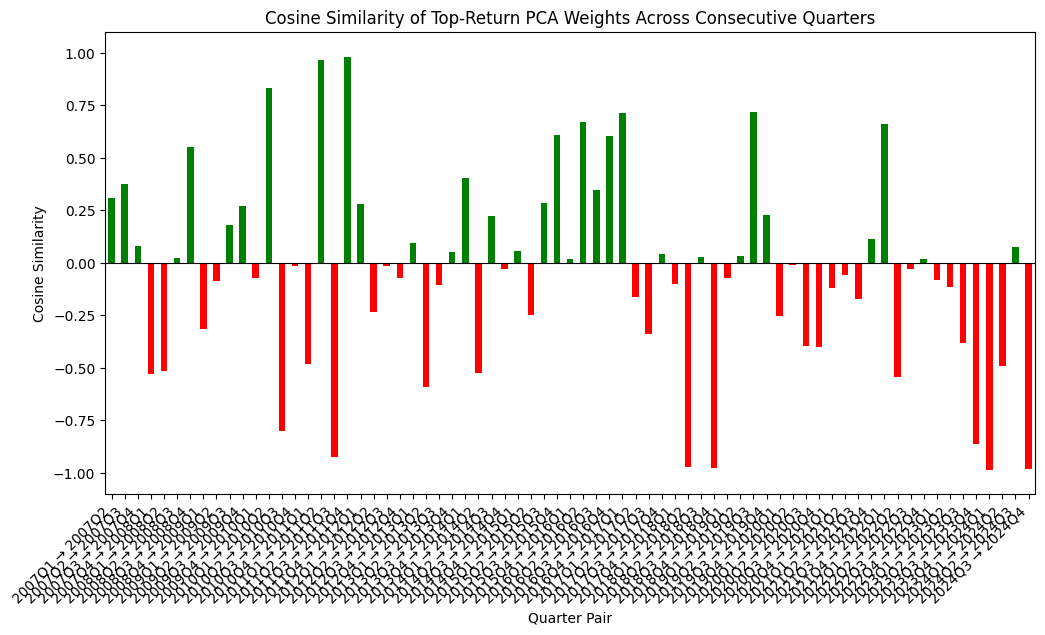

In [251]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
colors = ['green' if val > 0 else 'red' for val in sim_series]  # green = positive similarity, red = negative

sim_series.plot(kind='bar', color=colors)
plt.title("Cosine Similarity of Top-Return PCA Weights Across Consecutive Quarters")
plt.ylabel("Cosine Similarity")
plt.xlabel("Quarter Pair")
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linewidth=0.8)  # horizontal line at 0
plt.xticks(rotation=45, ha='right')
plt.show()
